In [27]:
import requests
from bs4 import BeautifulSoup
from lxml import html
import warnings
from time import sleep
import numpy as np
from scrapy import Selector
import pandas as pd
from datetime import datetime
import json
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
from pyecharts import Bar
from pyecharts import Pie
import jieba
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import re
from random import choice
from imageio import imread

In [2]:
import pyecharts

In [44]:
df = pd.read_table("用户地区.txt",header=None)

In [45]:
df.columns = ["地区分布"]

In [46]:
province = {"厦门":"福建厦门","长沙":"湖南长沙","南京":"江苏南京","西安":"陕西西安","舟山":"浙江舟山","杭州":"浙江杭州",
            "青岛":"山东青岛","成都":"四川成都","郑州":"河南郑州","台州":"浙江台州","沈阳":"辽宁沈阳","深圳":"广州深圳",
            "南昌":"江西南昌","武汉":"湖北武汉","合肥":"安徽合肥","苏州":"江苏苏州","福州":"福建福州","昆明":"云南昆明",
            "遵义":"贵州遵义","哈尔滨":"黑龙江哈尔滨","金华":"浙江金华","济南":"山东济南","宜昌":"湖北宜昌","安庆":"安徽安庆",
            "太原":"山西太原","漳州":"福建漳州","宜宾":"四川宜宾","扬州":"江苏扬州","唐山":"河北唐山","即墨":"山东青岛","泉州":"福建泉州",
            "开封":"河南开封","渭南":"陕西渭南","淄博":"山东淄博","宜春":"江西宜春","乐清, 温州":"浙江温州","枣庄":"山东枣庄",
            "邯郸":"河北邯郸","邢台":"河北邢台","绍兴":"浙江绍兴","辽阳":"辽宁辽阳","邵阳":"湖南","宁波":"浙江宁波","嘉兴":"浙江嘉兴",
            "安康":"陕西安康","菏泽":"山东菏泽","玉林":"广西玉林","庆阳":"甘肃庆阳","芜湖":"安徽芜湖","玉树":"青海玉树","江门":"广东江门",
            "日照":"山东日照","昌吉":"新疆昌吉","广州":"广东广州","南通":"江苏南通","鞍山":"辽宁鞍山"
            }

In [47]:
province

{'厦门': '福建厦门',
 '长沙': '湖南长沙',
 '南京': '江苏南京',
 '西安': '陕西西安',
 '舟山': '浙江舟山',
 '杭州': '浙江杭州',
 '青岛': '山东青岛',
 '成都': '四川成都',
 '郑州': '河南郑州',
 '台州': '浙江台州',
 '沈阳': '辽宁沈阳',
 '深圳': '广州深圳',
 '南昌': '江西南昌',
 '武汉': '湖北武汉',
 '合肥': '安徽合肥',
 '苏州': '江苏苏州',
 '福州': '福建福州',
 '昆明': '云南昆明',
 '遵义': '贵州遵义',
 '哈尔滨': '黑龙江哈尔滨',
 '金华': '浙江金华',
 '济南': '山东济南',
 '宜昌': '湖北宜昌',
 '安庆': '安徽安庆',
 '太原': '山西太原',
 '漳州': '福建漳州',
 '宜宾': '四川宜宾',
 '扬州': '江苏扬州',
 '唐山': '河北唐山',
 '即墨': '山东青岛',
 '泉州': '福建泉州',
 '开封': '河南开封',
 '渭南': '陕西渭南',
 '淄博': '山东淄博',
 '宜春': '江西宜春',
 '乐清, 温州': '浙江温州',
 '枣庄': '山东枣庄',
 '邯郸': '河北邯郸',
 '邢台': '河北邢台',
 '绍兴': '浙江绍兴',
 '辽阳': '辽宁辽阳',
 '邵阳': '湖南',
 '宁波': '浙江宁波',
 '嘉兴': '浙江嘉兴',
 '安康': '陕西安康',
 '菏泽': '山东菏泽',
 '玉林': '广西玉林',
 '庆阳': '甘肃庆阳',
 '芜湖': '安徽芜湖',
 '玉树': '青海玉树',
 '江门': '广东江门',
 '日照': '山东日照',
 '昌吉': '新疆昌吉',
 '广州': '广东广州',
 '南通': '江苏南通',
 '鞍山': '辽宁鞍山'}

In [48]:
df = df["地区分布"].replace(province)

In [49]:
df.value_counts().iloc[:20]

北京      95
上海      74
四川成都    49
广东广州    32
浙江杭州    26
陕西西安    25
江苏南京    24
广东深圳    24
湖北武汉    19
湖南长沙    18
福建厦门    17
山东青岛    15
重庆      14
江苏苏州    13
河南郑州    12
天津      12
安徽合肥    12
河北邢台     8
广州深圳     8
山东济南     7
Name: 地区分布, dtype: int64

In [51]:
bar = Bar("观众分布")
bar.add("观众分布比较",df.value_counts().iloc[:10].index, df.value_counts().iloc[:10])
bar.render("观众分布.html")

In [2]:
df_reviews = pd.read_table("评论集合.txt", header = None)

In [3]:
df_reviews.columns = ["评论"]

In [4]:
actors = ["范闲","张若昀","林婉儿","李沁","陈道明","庆帝","吴刚","陈萍萍","李小冉","长公主","袁泉","叶轻眉","于荣光","肖恩",
         "辛芷蕾","海棠朵朵","李纯","司理理","宋轶","范若若","郭麒麟","范思辙","肖战","言冰云"]

In [5]:
actors_dict = {}
for ac in actors:
    actors_dict[ac] = 0

In [6]:
for review in df_reviews["评论"].tolist():
    for actor in actors_dict.keys():
        if actor in review:
            actors_dict[actor] += 1

In [7]:
actors_dict

{'范闲': 50399,
 '张若昀': 3900,
 '林婉儿': 8374,
 '李沁': 2571,
 '陈道明': 5156,
 '庆帝': 15269,
 '吴刚': 2087,
 '陈萍萍': 6089,
 '李小冉': 1009,
 '长公主': 8849,
 '袁泉': 30,
 '叶轻眉': 6043,
 '于荣光': 378,
 '肖恩': 272,
 '辛芷蕾': 161,
 '海棠朵朵': 291,
 '李纯': 21,
 '司理理': 4736,
 '宋轶': 656,
 '范若若': 1611,
 '郭麒麟': 3421,
 '范思辙': 6441,
 '肖战': 1529,
 '言冰云': 676}

In [8]:
actor_pop = []
for i in range(0, len(actors)-1, 2):
    actor_pop.append(actors_dict[actors[i]] + actors_dict[actors[i + 1]])

In [9]:
actor_char = []
for i in range(0, len(actors)-1, 2):
    actor_char.append(actors[i] + "/" + actors[i + 1])

In [10]:
actor_char

['范闲/张若昀',
 '林婉儿/李沁',
 '陈道明/庆帝',
 '吴刚/陈萍萍',
 '李小冉/长公主',
 '袁泉/叶轻眉',
 '于荣光/肖恩',
 '辛芷蕾/海棠朵朵',
 '李纯/司理理',
 '宋轶/范若若',
 '郭麒麟/范思辙',
 '肖战/言冰云']

In [11]:
actor_pop

[54299, 10945, 20425, 8176, 9858, 6073, 650, 452, 4757, 2267, 9862, 2205]

In [12]:
bar = Bar('人物人气排名', '人物人气')
bar.add('人物人气排名',actor_char,actor_pop, is_label_show = True)
bar.render("人物人气排名.html")

In [13]:
rates = ["5星","4星","3星","2星","1星"]
num = [30.1, 46.2,16.7, 4.5, 2.5]
pie = Pie("评分统计")
pie.add("人数",rates, num, center = [25, 50], is_random = True, radius = [30, 75], rosetype = 'area', is_label_show = True)
pie.render("评分统计.html")

In [14]:
cp = 0
for review in df_reviews["评论"].tolist():
    if "范闲" in review and "林婉儿" in review:
        cp += 1

In [15]:
novel = 0
for review in df_reviews["评论"].tolist():
    if "小说" in review or "原著" in review:
        novel += 1

In [16]:
novel

18077

In [17]:
fanxian = []
lixin = []
chendaomin = []
lixiaoran = []
guoqilin = []
lichun = []
for review in df_reviews["评论"].tolist():
    if "范闲" in review or "张若昀" in review:
        fanxian.append(review)
    elif "林婉儿" in review or "李沁" in review:
        lixin.append(review)
    elif "陈道明" in review or "庆帝" in review:
        chendaomin.append(review)
    elif "李小冉" in review or "长公主" in review:
        chendaomin.append(review)
    elif "李纯" in review or "司理理" in review:
        lichun.append(review)
    elif "郭麒麟" in review or "范思辙" in review:
        guoqilin.append(review)
    

In [18]:
import jieba.posseg
STOP_WORDS = set([line.strip() for line in open("chineseStopWords.txt", encoding = "GBK").readlines()])

In [30]:
STOP_WORDS.add("范闲")

In [38]:
STOP_WORDS.add("庆帝")
STOP_WORDS.add("张若昀")
STOP_WORDS.add("范建")
STOP_WORDS.add("太子")
STOP_WORDS.add("演员")
STOP_WORDS.add("叶轻眉")
STOP_WORDS.add("主角")
STOP_WORDS.add("儿子")
STOP_WORDS.add("皇帝")
STOP_WORDS.add("观众")
STOP_WORDS.add("公主")
STOP_WORDS.add("不想")
STOP_WORDS.add("内裤")
STOP_WORDS.add("想要")
STOP_WORDS.add("身份")
STOP_WORDS.add("角色")
STOP_WORDS.add("小范")
STOP_WORDS.add("内裤")
STOP_WORDS.add("皇子")
STOP_WORDS.add("世界")
STOP_WORDS.add("穿越")
STOP_WORDS.add("陈道明")
STOP_WORDS.add("弟弟")
STOP_WORDS.add("内裤")
STOP_WORDS.add("姨娘")
STOP_WORDS.add("感觉")
STOP_WORDS.add("王启年")



In [39]:
STOP_WORDS = set(STOP_WORDS)

In [20]:
# words_list = []
# for word in fanxian_text:
#     if word not in STOP_WORDS:
#         words_list.append(word)

In [37]:
for fan in fanxian:
    for i in jieba.posseg.cut(fan):
        print(i)

号称/v
投资/vn
6/m
亿/m
，/x
集齐/v
陈道明/nr
吴刚/nr
袁泉/nr
等/u
一票/m
老戏骨/n
，/x
实力/n
演员/n
张若昀/nr
李沁/nr
主演/n
，/x
又/d
有/v
新/a
顶流/n
肖战/n
做配/v
的/uj
《/x
庆/vg
余年/m
》/x
，/x
爆/v
了/ul
。/x
张若昀/nr
、/x
李沁/nr
、/x
陈道明/nr
、/x
吴刚/nr
、/x
袁泉/nr
、/x
肖战/nr
…/x
…/x
就/d
连/a
出演/v
范闲/nr
童年/t
的/uj
小演员/n
（/x
韩昊霖/nr
饰/v
）/x
，/x
都/d
业务/n
熟练/a
。/x
范闲/nr
带/v
着/uz
现代人/n
的/uj
灵魂/n
，/x
穿越/v
到/v
古代/t
，/x
成/v
了/ul
一名/m
孩童/n
。/x
范闲/nr
自幼/d
远离/v
京都/ns
，/x
长/a
在/p
奶奶/n
膝下/n
。/x
主角/n
团/n
的/uj
人/n
各/r
有/v
技能/n
，/x
对/p
范闲/n
忠贞不二/i
，/x
作为/v
辅助/vn
陪/v
他/r
刷怪/v
闯关/v
。/x
就/d
以/p
目前/t
范闲/nr
遇到/v
的/uj
最大/a
难题/n
为/p
例/v
：/x
牛栏/nr
街/n
刺杀/v
。/x
为了/p
替/p
滕梓/ns
荆/ns
报仇/v
，/x
范闲怒/nr
杀/v
凶手/n
程/n
巨树/n
。/x
鉴/nr
检院/n
一处/m
主办/b
朱格/nr
，/x
将范/n
闲/n
关进/v
地牢/n
。/x
“/x
范闲/nr
是/v
我们/r
的/uj
师弟/n
！/x
“/x
朱格/nr
无奈/d
，/x
将范/n
闲/n
押出/v
鉴/nr
检院/n
，/x
要/v
就/d
地/n
处罚/v
。/x
“/x
陛下/n
有/v
旨/ng
，/x
放/v
了/ul
范闲/n
！/x
”/x
范闲/nr
出城/v
，/x
追捕/v
真凶/n
兼/v
北齐/ns
间谍/n
司理/n
理/n
（/x
李纯/nr
 /x
饰/v
）/x
。/x
范闲/nr
遇到/v
的/uj
所有/b
阻力/n
，/x
都/d
被/p
他/r
的/uj
好/a
命/n
消弭/v
。/x
播出/v
过半/t
，/x
范闲

又/d
不/d
可能/v
因为/c
一点/m
怀疑/v
就/d
对/p
范闲/n
发难/v
（/x
其实/d
诗/n
会/v
现场/n
的/uj
贺宗纬/nr
还有/v
郭保/nr
坤/ns
没有/v
因为/c
暮气/n
发难/v
也/d
是/v
这个/r
道理/n
，/x
并/c
不是/c
因为/c
他们/r
蠢/a
）/x
，/x
因此/c
X/x
自此/r
开始/v
了/ul
布局/n
，/x
因为/c
X/eng
有/v
一个/m
非常/d
重要/a
的/uj
帮手/v
（/x
因为/c
一些/m
特殊/a
羁绊/n
）/x
叫/v
庄墨韩/nr
，/x
北齐/ns
文坛/n
第一/m
大家/n
，/x
至于/p
这个/r
局/n
怎么/r
布/n
的/uj
，/x
我/r
就/d
不/d
多/m
说/v
辣/n
，/x
只能/v
说/v
这个/r
局/n
直接/ad
促使/v
了/ul
“/x
朝堂/n
斗/v
诗/n
”/x
这个/r
第一季/m
的/uj
最大/a
剧情/n
高潮/nr
，/x
大家/n
可以/c
继续/v
期待/v
一下/m
后续/v
剧情/n
的/uj
。/x
接着/c
在/p
进入/v
二/m
皇子/n
部分/n
前/f
，/x
提/v
点/m
别的/r
，/x
关于/p
贺宗伟/nr
。/x
贺宗伟/nr
在/p
单独/d
和/c
范闲/n
对话/n
的/uj
那里/r
，/x
其实/d
开始/v
显露/v
城府/n
了/ul
，/x
他/r
是/v
平民/n
出身/v
，/x
但是/c
野心/n
很大/a
，/x
手段/n
也/d
很多/m
，/x
是/v
后期/t
范闲/nr
比较/d
难缠/v
的/uj
一个/m
小/a
对手/v
之一/r
（/x
当然/d
这/r
也/d
和庆帝/nr
的/uj
刻意/v
安排/v
有关/vn
）/x
，/x
大家/n
可以/c
关注/v
一下/m
。/x
最后/f
就是/d
与/p
二/m
皇子/n
见面/n
的/uj
环节/n
了/ul
。/x
谢必安/nr
是/v
二/m
皇子/n
八家/m
将/d
之一/r
，/x
剑法/n
出众/n
，/x
不必/d
多/m
提/v
，/x
重要/a
的/uj
还是/c
二/m
皇子/n
这个/r
人物/n
的/uj
分析/vn
。/x
客观/

很多/m
人/n
吐/v
槽/ng
这/r
张/q
脸/n
不/d
符合/v
书/n
中/f
描写/v
的/uj
范闲/n
“/x
比/p
女人/n
还/d
美/q
”/x
的/uj
形象/n
，/x
其实/d
美丑/m
倒/v
在/p
其次/r
，/x
主要/b
是/v
年龄/n
感不/l
符合/v
少年/m
设定/v
，/x
扮相/v
没有/v
说服力/l
。/x
张若昀/nr
本/r
就/d
生/v
了/ul
一副/m
老成/nrfg
的/uj
长相/d
，/x
如今/t
又/d
已/d
31/m
岁/m
，/x
在/p
庆/vg
剧中/n
看起来/v
面颊/n
肿/v
胖/n
，/x
身形/n
壮硕/a
，/x
眼神/n
也/d
不再/d
清澈/a
，/x
剧组/n
的/uj
服化/vn
道/n
造型/n
设计/vn
和/c
灯光/n
也/d
不/d
给/p
力/n
，/x
非但/c
没有/v
扬长避短/i
，/x
反而/c
一再/d
做/v
减/v
分项/m
。/x
额前/nrfg
设计/vn
的/uj
碎/n
刘海儿/nr
，/x
油腻/n
的/uj
发型/vn
、/x
灰暗/z
的/uj
面色/n
、/x
厚重/a
的/uj
服饰/n
显得/v
人物/n
腰/n
粗/a
背/v
厚/a
脖子/n
短/a
，/x
不但/c
没有/v
演出/v
清新自然/i
的/uj
少年/m
气息/n
，/x
更/d
让/v
16/m
岁/m
的/uj
范闲/n
看起来/v
油腻感/l
堪比/ns
36/m
岁/m
。/x
林婉儿/nr
与/p
范闲/n
的/uj
初次/d
相遇/v
，/x
两个/m
人/n
对视/v
，/x
一个/m
失魂落魄/i
演/v
痴迷/v
看/v
呆/v
，/x
一个/m
睁大眼睛/n
饰/v
天真无邪/i
…/x
…/x
却/d
全/a
无/v
少男少女/l
那种/r
纯美/a
甜蜜/a
的/uj
悸动/vn
和/c
CP/eng
感/v
，/x
硬是/d
生/vn
生/vn
演出/v
了/ul
一场/m
尴尬/a
。/x
4./m
不/d
走心/v
的/uj
服化/vn
道/n
。/x
场景/n
设计/vn
缺乏/v
特点/n
，/x
装饰/n
道具/n
制作/vn
粗陋/a
。/x
长/a
公主/n
披头散发/i
头饰/n
廉价/n


 /x
 /x
王启年/nr
改编/v
的/uj
挺讨/v
喜/v
，/x
暂且/d
不/d
谈/v
。/x
但/c
还/d
没/v
进城/v
就/d
安排/v
妓女/n
，/x
安排/v
侍卫/nr
杀/v
侍女/n
？/x
？/x
？/x
怕/v
是/v
安排/v
的/uj
有点/n
过于/v
做作/v
，/x
庆帝/n
一/m
开始/v
并未/d
保护/v
范闲/nr
，/x
他/r
只是/c
下/f
了/ul
旨意/v
召范/v
闲入/v
宫/n
（/x
撒/v
了/ul
鱼饵/n
）/x
，/x
他/r
是/v
一个/m
强大/a
且/zg
冷酷/a
的/uj
男人/n
，/x
而/c
不是/c
一个/m
慈父/nrt
，/x
他/r
是/v
旁观者/n
，/x
不是/c
入/v
局人/n
。/x
范闲/nr
不是/c
第一天/m
穿越/v
来/v
，/x
不是/c
不/d
了解/v
这样/r
的/uj
社会/n
，/x
非/h
要/v
树立/v
一个/m
人人平等/l
，/x
和/c
尊卑/n
有/v
别的/r
社会/n
脱节/v
的/uj
形象/n
太/d
俗套/n
。/x
包括/v
不/d
收/v
滕子京/nr
为/p
仆人/n
，/x
都/d
是/v
太/d
矫情/a
。/x
小说/n
的/uj
主旨/n
是/v
复仇/v
，/x
不是/c
人人平等/l
与/p
自由/a
（/x
这/r
是/v
叶轻眉/nr
的/uj
主旨/n
，/x
不是/c
范闲/nr
的/uj
主旨/n
，/x
范闲/nr
只是/c
觉得/v
她/r
妈/n
死/v
的/uj
冤/n
）/x
其次/r
诗会/n
真/d
没/v
这么/r
重要/a
，/x
只是/c
范闲/nr
装/v
了/ul
个/q
B/eng
而已/y
，/x
没/v
必要/d
庆帝/n
关注/v
，/x
铺垫/n
过重/v
。/x
庄莫闲/nr
出场/n
时/n
可以/c
重/a
一点/m
，/x
这次/r
不/d
值得/v
。/x
关于/p
庆/vg
余年/m
，/x
我/r
和/c
包括/v
老猫/n
在内/u
的/uj
很多/m
人/n
一样/r
，/x
并/c
不/d
喜欢/v
范闲/nr
这个/r
主角/n
。/x
我/r
喜欢/v
看轻/v
天下/s
须眉/nr
的/uj
小/n
叶子/n

的/uj
老夫/nr
人/n
。/x
这/r
就是/d
使得/v
《/x
庆/vg
余年/m
》/x
有/v
了/ul
“/x
东方/s
人文主义/n
”/x
的/uj
价值/n
，/x
即便/c
它/r
写/v
了/ul
谍战/n
，/x
写/v
了/ul
江湖/ns
，/x
写/v
了/ul
庙堂/n
，/x
写/v
了/ul
角逐/v
，/x
但/c
却/d
又/d
分/v
分钟/q
拉/v
回/v
日常/d
，/x
是/v
庆帝/n
的/uj
馄饨/n
，/x
是/v
范闲/n
的/uj
鸡腿/n
姑娘/n
，/x
是/v
食物/n
里/f
流露出/i
的/uj
生活/vn
热爱/a
，/x
是/v
遮掩/v
不住/v
的/uj
内心/n
光明/n
。/x
《/x
庆/vg
余年/m
》/x
剧集/n
的/uj
改编/v
，/x
基本上/n
保留/v
了/ul
原著/n
中/f
的/uj
精华/nz
。/x
而/c
相对/d
于/p
原著/n
中范/n
闲/n
更为/d
蔫儿坏/l
和/c
玩耍/v
的/uj
性格/n
，/x
编剧/n
大胆/n
改编/v
，/x
让/v
剧/n
集中/v
的/uj
范闲/n
保留/v
了/ul
玩世不恭/i
的/uj
气质/n
精髓/n
，/x
但/c
同时/c
言语/nr
行为/v
上/f
不再/d
那么/r
臭屁/n
，/x
略显/v
心智/n
，/x
也/d
更/d
符合/v
他/r
在/p
后续/v
故事/n
中/f
的/uj
地位/n
和/c
身份/n
。/x
从/p
第/m
5/m
集/n
开始/v
，/x
被/p
误认为/v
是/v
《/x
红楼/n
》/x
作者/n
本人/r
的/uj
范闲/n
，/x
成为/v
民众/n
口中/s
的/uj
“/x
南庆/ns
大/n
才子/n
”/x
，/x
并/c
获得/v
了/ul
南庆/ns
二/m
皇子/n
的/uj
注意/v
，/x
才/d
有/v
了/ul
后面/f
1/m
集/n
才子/n
诗会/n
的/uj
比拼/v
，/x
引发/v
后续/v
剧情/n
的/uj
发展/vn
。/x
范闲/nr
进京/v
拿/v
着/uz
母亲/n
的/uj
黑/n
皮箱/n
，/x
虽然/c
打不开/v
，/x
被/p
范闲/n
收藏/v
于/p
京都/ns
的/uj

皇宫/n
里/f
居然/d
敢/v
肆意/d
谈论/vn
皇家/n
的/uj
不是/c
，/x
别人/r
好意/v
提醒/v
他/r
还/d
满不在乎/i
，/x
这/r
要是/c
被/p
拿来/v
做文章/n
谁/r
都/d
救/v
不了/v
，/x
这种/r
没脑子/l
的/uj
行为/v
根本/a
活/vn
不过/c
第一集/m
。/x
这/r
本书/r
主要/b
在/p
讲/v
权谋/n
，/x
范闲/nr
大多数/m
时候/n
也/d
在/p
搞/v
斗争/vn
，/x
他/r
勤于/v
谋划/n
算计/v
、/x
擅长/v
判断/v
局势/n
，/x
喜欢/v
提前/v
布局/n
。/x
为了/p
对付/vn
长/a
公主/n
等/u
人/n
，/x
在/p
皇帝/n
身边/s
安插/v
钉子/n
；/x
为了/p
斗倒/vn
江南/ns
明家/nr
各种/r
设套/n
，/x
甚至/d
跟/p
北齐/ns
皇帝/n
合作/vn
，/x
一步步/m
将/d
对手/v
逼/v
上/f
绝路/m
。/x
分化瓦解/n
、/x
肉体/n
消灭/v
，/x
把/p
二/m
皇子/n
的/uj
势力/n
清理/a
的/uj
干干净净/z
，/x
逼/v
的/uj
长/n
公主/n
一步步/m
退让/v
，/x
太子/n
也/d
被/p
打压/v
的/uj
不敢/d
动弹/n
，/x
在/p
朝中/ns
风头/n
一时无两/i
。/x
这/r
里面/f
的/uj
权谋/n
斗争/vn
非常/d
精彩/n
，/x
那种/r
层层/n
推进/v
后/f
图穷匕见/i
的/uj
那一刻/r
可以/c
说/v
相当/d
畅快/a
淋漓/v
。/x
而/c
剧里/n
少有/v
描绘/v
范闲/nr
的/uj
谋划/n
布局/n
，/x
很多/m
情节/n
被/p
砍/v
，/x
主角/n
迄今/d
也/d
没什么/l
大/a
动作/n
，/x
接手/v
监察院/n
最/d
重要/a
的/uj
是/v
组建/v
启年/l
小组/n
，/x
培养/v
心腹/n
势力/n
，/x
不/d
知道/v
他/r
要/v
等到/v
什么/r
时候/n
。/x
范闲/nr
最/d
值得/v
欣赏/v
的/uj
是/v
他/r
足够/v
上/f
进/v
，/x
经历/n
了/ul
瘫痪/v
人

表演/v
注意/v
细节/n
，/x
哭/v
戏/n
尤其/d
能/v
让/v
观众/n
代入/n
。/x
《/x
我/r
和/c
我/r
的/uj
祖国/n
》/x
的/uj
冬冬/t
也/d
是/v
很多/m
人/n
的/uj
心头/s
好/a
。/x
这次/r
演/v
的/uj
小范/n
闲/n
古灵精怪/i
，/x
但/c
又/d
感觉/n
是/v
有/v
担当/v
的/uj
（/x
毕竟/d
设定/v
是/v
个/q
回到/v
古代/t
的/uj
年轻人/n
嘛/y
）/x
，/x
而且/c
没/v
觉得/v
他/r
和/c
后来/t
的/uj
张若昀/nr
还有/v
几分/m
相似/v
吗/y
？/x
只/d
可惜/v
戏份/n
太/d
少/a
，/x
有点/n
不够看/l
。/x
我/r
是/v
没有/v
看过/v
猫腻/n
原著/n
的/uj
，/x
所以/c
会/v
不/d
带/v
着/uz
任何/r
“/x
是不是/l
符合/v
我/r
的/uj
期待/v
”/x
这样/r
的/uj
预设/vn
去/v
看/v
此剧/r
，/x
反而/c
会/v
更/d
期待/v
范闲/nr
之后/f
的/uj
人生/n
会/v
怎样/r
的/uj
跌宕起伏/l
，/x
如何/r
的/uj
波云/n
诡谲/a
。/x
毕竟/d
少年/m
刚/d
出山/v
，/x
未来/t
才/d
刚刚/d
展开/v
一角/m
呢/y
。/x
表演/v
方面/n
，/x
说实话/l
戏/n
都/d
是/v
老戏骨/n
们/k
撑起来/l
的/uj
。/x
陈道明/nr
老师/n
表现/v
一贯/m
的/uj
稳定/a
，/x
阴桀/nr
帝王/nr
这/r
类/q
角色/n
对/p
他/r
来说/u
毫无/v
难度/d
。/x
吴刚/nr
老师/n
贡献/n
的/uj
陈萍萍/nr
一角/m
，/x
是/v
书/n
中/f
非常/d
重要/a
的/uj
人物/n
，/x
目前/t
来看/u
虽然/c
只有/c
前面/f
的/uj
一场/m
戏份/n
，/x
但是/c
吴刚/nr
老师/n
的/uj
表演/v
十分/m
精髓/n
，/x
仅仅/d
用/p
眼神/n
就/d
把/p
一个/m
瘫坐/v
在/p
轮椅/n
上/f
的/uj
心怀/n
家国/n
的/uj
男人/n
勾勒/

叶轻眉/nr
对/p
世间/n
美好愿望/i
：/x
“/x
我/r
希望/v
庆国/ns
之/u
法/j
，/x
为生/v
民/ng
而立/v
，/x
不/d
因/p
高贵/a
容忍/a
，/x
不/d
因/p
贫穷/a
剥夺/v
，/x
无/v
不白之冤/i
，/x
无/v
强加/v
之/u
罪/n
，/x
遵/nr
法/j
如/v
仗/n
剑/n
，/x
破/v
魍魉/n
迷崇/v
，/x
不/d
求/v
神明/n
；/x
我/r
希望/v
庆国/ns
之/u
民/n
，/x
有/v
真理/n
可循/v
，/x
知/v
礼义/n
，/x
守仁/v
心/n
，/x
不/d
以/p
钱财/nr
论/zg
成败/v
，/x
不/d
因/p
权势/n
而/c
屈从/v
，/x
同情/n
弱小/n
，/x
痛恨/v
不平/n
，/x
危难/an
时/ng
坚/v
心志/n
，/x
无人/n
处常/d
自省/r
；/x
我/r
希望/v
这/r
世间/n
再/d
无/v
压迫/v
束缚/vn
，/x
凡/d
生于/v
世/n
，/x
都/d
能/v
有/v
活着/v
的/uj
权利/n
，/x
有/v
自由/a
的/uj
权利/n
，/x
亦/d
有/v
幸福/a
的/uj
权利/n
，/x
愿/v
终有/v
一日/m
，/x
人/n
人生/n
来/v
平等/a
，/x
再/d
无/v
贵贱/n
之/u
分/v
，/x
守护/v
生命/vn
，/x
追求/v
光明/n
，/x
此/zg
为/p
我心/n
所/c
愿/v
，/x
虽/zg
万千/m
曲折/a
，/x
不畏/v
前行/v
。/x
”/x
范闲/nr
看到/v
她/r
留下/v
的话/u
，/x
才/d
明白/nr
叶轻眉/nr
死亡/v
的/uj
理由/n
，/x
但/c
他/r
当时/t
心里/s
想着/v
是/v
不/d
去/v
继承/v
她/r
的/uj
遗愿/n
，/x
不/d
愿/v
以/p
一/m
人/n
之/u
力/n
与/p
世事/n
不公/n
抗争/nz
，/x
而是/c
想/v
做/v
一个/m
平凡/a
的/uj
人/n
。/x
可以/c
预测/vn
，/x
随着/p
范闲/nr
经历/n
更/d
多/m
，/x
他/r
会/v
从/p
一个/m
善良/a
的/uj
务实/d
主义者/n

一/m
众/ng
小生/n
里/f
算不上/l
帅哥/nr
，/x
甚至/d
长相/d
也/d
很/d
“/x
现代/t
”/x
，/x
不/d
像/v
胡歌/nr
那样/r
天生/n
就是/d
古装戏/n
的/uj
料/n
。/x
可/v
偏偏/d
就是/d
在/p
《/x
庆/vg
余年/m
》/x
中/f
，/x
张若昀/nr
举手/v
抬足/v
之间/f
有/v
一股/m
试图/v
掩藏/v
的/uj
现代人/n
气质/n
，/x
一看/u
就/d
给/p
人/n
一种/m
范闲/nr
就是/d
一个/m
混/v
在/p
古代人/n
之中/r
的/uj
现代人/n
的/uj
奇妙/a
感觉/n
。/x
这样/r
的/uj
演员/n
和/c
角色/n
，/x
也/d
算/v
得/ud
上/f
恰好/d
契合/v
了/ul
。/x
最后/f
，/x
陈道明/nr
老师/n
是/v
我/r
看/v
这部/r
剧/n
的/uj
初衷/d
，/x
戏/n
演得/v
依然/d
是/v
稳/a
。/x
庆帝/n
此人/r
的/uj
风度/n
、/x
城府/n
以及/c
难以捉摸/i
的/uj
气质/n
都/d
被/p
演绎/v
得/ud
不露痕迹/l
，/x
不过/c
就/d
我/r
的/uj
直觉/n
来看/u
，/x
估计/v
这/r
货/n
也/d
不怎么/l
爱范/nr
闲/v
，/x
八成/m
是/v
最后/f
的/uj
总/n
BOSS/eng
了/ul
。/x
他/r
更/d
不能/v
利用/n
自己/r
的/uj
现代/t
技术/n
在/p
古代/t
玩/v
技术/n
爆炸/v
，/x
因为/c
还有/v
一个/m
主角/n
，/x
也/d
就是/d
范闲/nr
的/uj
妈妈/n
已经/d
提前/v
做好/v
了/ul
这/r
一切/r
。/x
更/d
有趣/a
更/d
吸引/v
我/r
的/uj
是/v
范闲/n
妈妈/n
这个/r
角色/n
，/x
从/p
这些/r
发明创造/l
来看/u
，/x
她/r
显然/ad
也/d
是/v
和/c
主角/n
来自/v
同一个/b
时代/n
。/x
原来/d
范闲/nr
和/c
妈妈/n
是/v
前仆后继/i
的/uj
角色/n
。/x
先/d
说/v
范闲/n
。/x
例如/v
范闲/nr
开始/v
用/p

KeyboardInterrupt: 

In [42]:
def cut_words_with_pos(text):
    seg = jieba.posseg.cut(text)
    res = []
    for i in seg:
        if i.flag in ["a", "v", "x", "n", "an", "vn", "nz", "nt", "nr"] and is_fine_word(i.word):
            res.append(i.word)
    return list(res)

# 过滤词长，过滤停用词，只保留中文
def is_fine_word(word, min_length=2):
    rule = re.compile(r"^[\u4e00-\u9fa5]+$")
    if len(word) >= min_length and word not in STOP_WORDS and re.search(rule, word):
        return True
    else:
        return False
    
    
def count_words(texts):
    word_list = []
    for line in texts:
        words = cut_words_with_pos(line)
        word_list += words

    # 统计词频并按照词频由大到小排序，取top500
    cnt = pd.Series(word_list).value_counts().head(500)

    # 可以把结果输出到文件，进行一些手动调整
    # cnt.to_csv("data/cntliu.csv")

    # 返回字典格式
    return cnt.to_dict()


# 定义颜色，方法很多，这里用到的方法是在四个颜色中随机抽取
def my_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return choice(["rgb(94,38,18)", "rgb(41,36,33)", "rgb(128,128,105)", "rgb(112,128,105)"])

def draw_cloud(mask_path, word_freq, save_path):
    mask = imread(mask_path)  #读取图片
    wc = WordCloud(font_path='kaiti.TTF',  # 设置字体
                   background_color="white",  # 背景颜色
                   max_words=500,  # 词云显示的最大词数
                   mask=mask,  # 设置背景图片
                   max_font_size=80,  # 字体最大值
                   random_state=42,
                   )
    # generate_from_frequencies方法，从词频产生词云输入
    wc.generate_from_frequencies(word_freq)

    plt.figure()

    # 刘峰， 采用自定义颜色
    plt.imshow(wc.recolor(color_func=my_color_func), interpolation='bilinear')

    # 何小嫚， 采用图片底色
    # image_colors = ImageColorGenerator(mask)
    # plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')

    plt.axis("off")
    wc.to_file(save_path)
    plt.show()

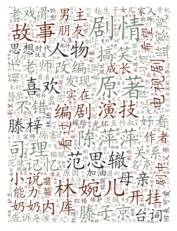

In [43]:
# 获取关键词及词频
input_freq = count_words(fanxian)
# 经过手动调整过的词频文件,供参考
# freq = pd.read_csv("data/cntliu.csv", header=None, index_col=0)
# input_freq = freq[1].to_dict()
draw_cloud("pic.jpg", input_freq, "fanxian.png")

In [9]:
# def login(username, password):
#     post_url = 'https://accounts.douban.com/j/mobile/login/basic'
    
#     headers = {
#         'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.79 Safari/537.36'
#     }
    
#     postdata = {
#         "ck":"",
#         "name":username,
#         "password":password,
#         'rememberme' : 'false',
#         'ticket':'eR9MhiZbkwPwcW0k1z7BS0P6DhprnObSMYHAih1deWqbzsyHaf1KQ8N6cl7undcWpwD21h9HE9w*'
#     }
    
#         # 代理服务器
#     proxyHost = "http-dyn.abuyun.com"
#     proxyPort = "9020"

#     # 代理隧道验证信息
#     proxyUser = "HKFA9D1VB2KV022D"
#     proxyPass = "02AE5E82E401BF4E"

#     proxyMeta = "http://%(user)s:%(pass)s@%(host)s:%(port)s" % {
#         "host": proxyHost,
#         "port": proxyPort,
#         "user": proxyUser,
#         "pass": proxyPass,
#     }

#     proxies = {
#         "http": proxyMeta,
#         "https": proxyMeta,
#     }
    
#     login_page = session.post(post_url, data=postdata, headers=headers, proxies = proxies)
    
#     res_json = json.loads(login_page.text)
#     if res_json["status"] == "success":
#         print("登录成功")
#         with open("douban.cookie","wb") as f:
#             pickle.dump(login_page.cookies, f)
#     else:
#         print(res_json)
#         print("登录失败")
        
    
        

# def spider_movie():
#     # 通过查看用户个人信息来判断是否已经登录
#     agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.79 Safari/537.36'
#     headers = {
#         'User-Agent': agent
#     }
# #     url = "https://www.douban.com/people/204781218/"
#     url = "https://www.douban.com/people/154504197/"
    
#     # 代理服务器
#     proxyHost = "http-dyn.abuyun.com"
#     proxyPort = "9020"

#     # 代理隧道验证信息
#     proxyUser = "HKFA9D1VB2KV022D"
#     proxyPass = "02AE5E82E401BF4E"

#     proxyMeta = "http://%(user)s:%(pass)s@%(host)s:%(port)s" % {
#         "host": proxyHost,
#         "port": proxyPort,
#         "user": proxyUser,
#         "pass": proxyPass,
#     }

#     proxies = {
#         "http": proxyMeta,
#         "https": proxyMeta,
#     }
#     with open("douban.cookie","rb") as f:
#         cookies = pickle.load(f)
#         page = requests.get(url, headers=headers, proxies = proxies, cookies = cookies).text
#         soup = BeautifulSoup(page, "lxml")
#         user_info = soup.select("div.user-info a")
#         if user_info:
#             for user in user_info:
#                 print(user.get_text())
#         else:
#             print(soup.select("div.user-info"))
        
# if __name__ == '__main__':
#     login("15267862911","xjx1027362067")
# #     spider_movie()
        
    
